In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_ba_with_embedding(n=50, m=2, space_size=100):
    """
    生成 BA 无标度网络（Barabási–Albert model），并进行二维嵌入。
    参数:
        n: 节点总数
        m: 每个新节点连接的边数（m <= n）
        space_size: 节点嵌入的二维空间边界
    返回:
        G: networkx 图对象
        positions: 节点位置字典 {节点: (x, y)}
    """
    # 1. 生成 BA 网络
    G = nx.barabasi_albert_graph(n=n, m=m)

    # 2. 随机生成二维空间中的节点位置
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')

    # 3. 给每条边设置权重（欧几里得距离）
    for u, v in G.edges():
        dist = np.linalg.norm(positions[u] - positions[v])
        G[u][v]['weight'] = dist

    return G, positions



In [3]:
def plot_ba_network(G, positions, n, m):
    """
    绘制 BA 网络图，并标注参数信息
    """
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos=positions,
        with_labels=True,
        node_color='gold',
        node_size=300,
        edge_color='gray',
        width=1.5
    )
    plt.title(f"BA Scale-Free Network (n={n}, m={m})", fontsize=14)
    plt.axis('equal')
    plt.show()


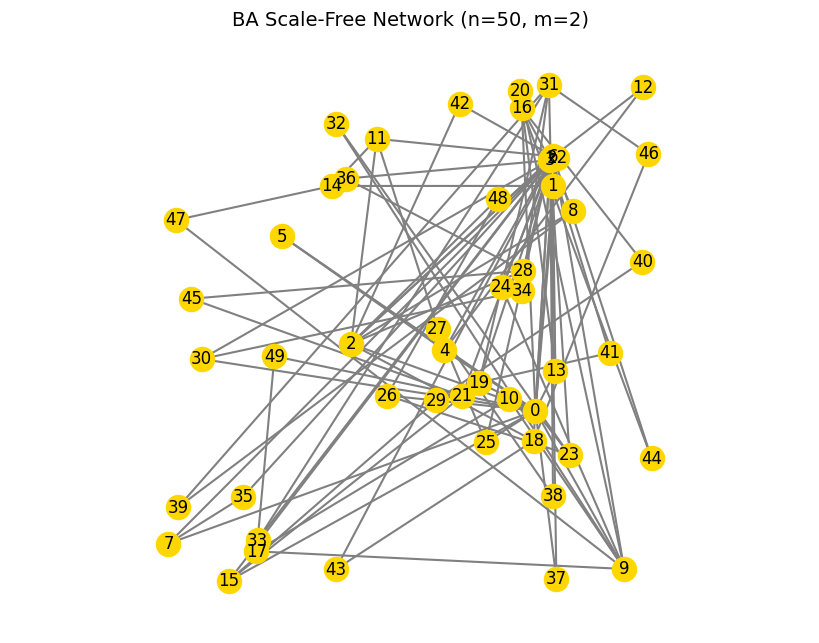

In [4]:
# 🔧 使用示例
n = 50   # 节点数
m = 2    # 每个新节点连接的边数（建议 1 <= m < n）

G_ba, pos_ba = generate_ba_with_embedding(n=n, m=m)
plot_ba_network(G_ba, pos_ba, n=n, m=m)

In [8]:
def abundance_index(G):
    return sum(dict(G.degree()).values())

# 示例网络
G = nx.barabasi_albert_graph(n=50, m=2)

# 计算丰度
A = abundance_index(G)
print("Abundance index A =", A)

# 验证：应该等于 2 * G.number_of_edges()
assert A == 2 * G.number_of_edges()

Abundance index A = 192


In [ ]:
# 节点的加权连接强度
def node_weight_sums(G):
    """
    对每个节点，计算其连接边的权重之和。
    返回字典 {node: sum of incident edge weights}
    """
    weight_sum = {}
    for node in G.nodes():
        total = 0
        for neighbor in G.neighbors(node):
            total += G[node][neighbor]['weight']
        weight_sum[node] = total
    return weight_sum

In [11]:
node_weight_sum_dict = node_weight_sums(G_ba)

# 打印部分结果
for node, weight_sum in list(node_weight_sum_dict.items())[:50]:
    print(f"Node {node}: total edge weight = {weight_sum:.2f}")

Node 0: total edge weight = 732.15
Node 1: total edge weight = 123.48
Node 2: total edge weight = 405.29
Node 3: total edge weight = 914.38
Node 4: total edge weight = 167.14
Node 5: total edge weight = 98.85
Node 6: total edge weight = 637.55
Node 7: total edge weight = 199.46
Node 8: total edge weight = 158.09
Node 9: total edge weight = 600.28
Node 10: total edge weight = 103.65
Node 11: total edge weight = 126.91
Node 12: total edge weight = 86.57
Node 13: total edge weight = 155.97
Node 14: total edge weight = 87.18
Node 15: total edge weight = 285.16
Node 16: total edge weight = 182.25
Node 17: total edge weight = 129.76
Node 18: total edge weight = 202.04
Node 19: total edge weight = 153.89
Node 20: total edge weight = 150.91
Node 21: total edge weight = 163.77
Node 22: total edge weight = 50.44
Node 23: total edge weight = 185.34
Node 24: total edge weight = 87.60
Node 25: total edge weight = 92.25
Node 26: total edge weight = 110.79
Node 27: total edge weight = 102.91
Node 28: